In [9]:
import numpy as np
import matplotlib.pyplot as plt
import Inflow
Inflow.logging.enable_logging()
import ResearchProjects
import pandas as pd
import one

In [10]:
#adaptation is a sublibrary within the ResearchProject
from ResearchProjects import adaptation
#inside adaptation experiment there are different file, we import the "aliases"
from ResearchProjects.adaptation import aliases

In [25]:
connector = one.ONE()
connector.set_data_access_mode('remote')
ResearchProjects.adaptation.select.cells_labelled
display(ResearchProjects.adaptation.select.cells_labelled)

<function ResearchProjects.adaptation.select.cells_labelled(rois_df, iscell=True, **kwargs)>

In [34]:
sessions = connector.search(subject = 'wm18', number = 1,  details = True)
display(sessions)

([], None)

In [31]:
sessions = connector.search?

Signature: connector.search(details=False, query_type=None, **kwargs)
Docstring:
Searches sessions matching the given criteria and returns a list of matching eids

For a list of search terms, use the method

    one.search_terms(query_type='remote')

For all of the search parameters, a single value or list may be provided.  For dataset,
the sessions returned will contain all listed datasets.  For the other parameters,
the session must contain at least one of the entries. NB: Wildcards are not permitted,
however if wildcards property is False, regular expressions may be used for all but
number and date_range.

Parameters
----------
dataset : str, list
    List of dataset names. Returns sessions containing all these datasets.
    A dataset matches if it contains the search string e.g. 'wheel.position' matches
    '_ibl_wheel.position.npy'
date_range : str, list, datetime.datetime, datetime.date, pandas.timestamp
    A single date to search or a list of 2 dates that define the range (incl

In [29]:
session = sessions.iloc[0] #Extracting row number zero from data_df?
print(session) #Show the result

AttributeError: 'tuple' object has no attribute 'iloc'

In [6]:
session.json #Get information about the target and non target stim

{'channels': ['R', 'G'],
 'whisker_stims': {'Stimulus right': {'0': 'D1', '1': 'C1'}},
 'laser_settings': {'laser1': {'power': 100, 'frequency': 1040}}}

In [28]:
#Doing the same thing, show you all the trials related to the session that you chose
trial_df = adaptation.pipelines.generate_trials_df(session)
#adaptation.pipelines.generate_trials_df(session_details=session)
display(trial_df)

Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0         3604962.0        3000.0    3607961.0             0.0          0.0  \
1         3612647.0        3000.0    3615646.0             1.0          0.0   
2         3620367.0        3000.0    3623366.0             0.0          0.0   
3         3627878.0        3000.0    3630877.0             0.0          0.0   
4         3635171.0        3000.0    3638170.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
245       5657849.0        3000.0    5660848.0             0.0          0.0   
246       5666390.0        3000.0    5669389.0             1.0          0.0   
247       5675445.0        3000.0    5678444.0             1.0          0.0   
248       5684577.0        3000.0    5687576.0             1.0          0.0   
249       5694811.0        3000.0    5697810.0             1.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3700.0            1250.0  \
1                     100.0                      3700.0            1250.0   
2                     100.0                      3700.0            1250.0   
3                     100.0                      3700.0            1250.0   
4                     100.0                      3700.0            1250.0   
...                     ...                         ...               ...   
245                   100.0                      3700.0            1250.0   
246                   100.0                      3700.0            1250.0   
247                   100.0                      3700.0            1250.0   
248                   100.0                      3700.0            1250.0   
249                   100.0                      3700.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... Start of Dec Per   
trial#                                         ...                    
0                  0.0                    0.0  ...           3000.0  \
1                  0.0                    1.0  ...           3000.0   
2                  0.0                    2.0  ...           3000.0   
3                  0.0                    3.0  ...           3000.0   
4                  0.0                    4.0  ...           3000.0   
...                ...                    ...  ...              ...   
245                0.0                  245.0  ...           3000.0   
246                0.0                  246.0  ...           3000.0   
247                0.0                  247.0  ...           3000.0   
248                0.0                  248.0  ...           3000.0   
249                0.0                  249.0  ...           3000.0   

       End of Dec Per End of trial  Trial + ITI  Result   
trial#                                                    
0              4228.0       4328.0       7685.0     0.0  \
1              4087.0       4187.0       7720.0     0.0   
2              4102.0       4202.0       7511.0     0.0   
3              4179.0       4279.0       7293.0     0.0   
4              4254.0       4354.0       8472.0     0.0   
...               ...          ...          ...     ...   
245            4271.0       4371.0       8541.0     0.0   
246            4324.0       5055.0       9055.0     1.0   
247            5500.0       5800.0       9132.0     2.0   
248            5500.0       5800.0      10234.0     2.0   
249            4659.0       4759.0       7866.0     0.0   

                                                tiff_path  target_stim   
trial#                                                                   
0       \\Mountcastle\lab\data\ONE\Adaptation\wm18\202...     D1_10_90  \
1       \\Mountcastle\lab\data\ONE\Adaptation\wm18\202...     C1

In [29]:
first_col = trial_df["Trial Start"]
print(first_col)
second_col = trial_df["Stimulus Ref"]
print(second_col)
f_choice = trial_df["Free Choice On"]
print(f_choice)

trial#
0      3604962.0
1      3612647.0
2      3620367.0
3      3627878.0
4      3635171.0
         ...    
245    5657849.0
246    5666390.0
247    5675445.0
248    5684577.0
249    5694811.0
Name: Trial Start, Length: 250, dtype: float64
trial#
0      3000.0
1      3000.0
2      3000.0
3      3000.0
4      3000.0
        ...  
245    3000.0
246    3000.0
247    3000.0
248    3000.0
249    3000.0
Name: Stimulus Ref, Length: 250, dtype: float64
trial#
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
249    0.0
Name: Free Choice On, Length: 250, dtype: float64


In [30]:
trial_df.loc[0]

Trial Start                                                           3604962.0
Stimulus Ref                                                             3000.0
Stimulus It                                                           3607961.0
Stimulus right                                                              0.0
Electr Stim                                                                 0.0
Curr water duration                                                       100.0
Timepoint of valve opening                                               3700.0
Data acquisition                                                         1250.0
Free Choice On                                                              0.0
current TDMS_p1 trial                                                       0.0
Target stimulus               10hz_10v_600ms_120hz_0tn_0an_1nr90hz_10v_400ms...
Nontarget stimulus                    NaNhz_0v_1000ms_NaNhz_NaNtn_NaNan_1nr.bin
bias correction mode                    

We want to show in y axis the types of stims with frequency change (=target) and in x the amount of successfull trials for each stim type

In [31]:
#Lets axtrcat col related to target stim
trial_df["Target stimulus"]
trial_df["Result"]


trial#
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
245    0.0
246    1.0
247    2.0
248    2.0
249    0.0
Name: Result, Length: 250, dtype: float64

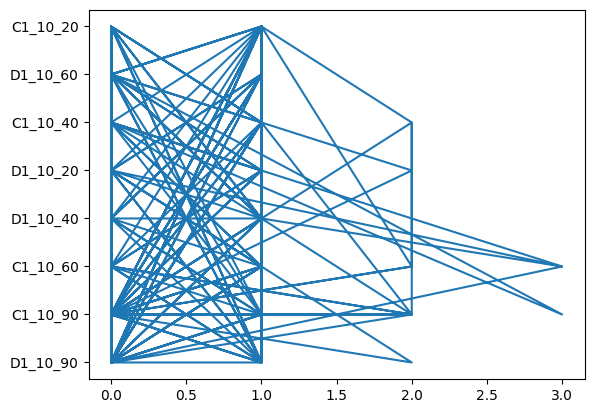

In [32]:
plt.plot(trial_df["Result"],trial_df["target_stim"]) #apparently this mice18 learne sth :)

In [12]:
#Inflow.run_suite2p_gui?
#Inflow.run_suite2p_gui(session_details=session)
#adaptation.pipelines.run_suite2p?
#adaptation.pipelines.run_suite2p(session_details=session)

In [35]:
 
T = trial_df['Trial Start']/60000    #Change the trial start timing to sec
display(T)                                     #You need to add new value to your data frame, so when you print trial df
trial_df['Trial Start'] = T                                                         #you will see updated time

trial#
0      60.082700
1      60.210783
2      60.339450
3      60.464633
4      60.586183
         ...    
245    94.297483
246    94.439833
247    94.590750
248    94.742950
249    94.913517
Name: Trial Start, Length: 250, dtype: float64

In [36]:
display(trial_df)

Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0         60.082700        3000.0    3607961.0             0.0          0.0  \
1         60.210783        3000.0    3615646.0             1.0          0.0   
2         60.339450        3000.0    3623366.0             0.0          0.0   
3         60.464633        3000.0    3630877.0             0.0          0.0   
4         60.586183        3000.0    3638170.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
245       94.297483        3000.0    5660848.0             0.0          0.0   
246       94.439833        3000.0    5669389.0             1.0          0.0   
247       94.590750        3000.0    5678444.0             1.0          0.0   
248       94.742950        3000.0    5687576.0             1.0          0.0   
249       94.913517        3000.0    5697810.0             1.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3700.0            1250.0  \
1                     100.0                      3700.0            1250.0   
2                     100.0                      3700.0            1250.0   
3                     100.0                      3700.0            1250.0   
4                     100.0                      3700.0            1250.0   
...                     ...                         ...               ...   
245                   100.0                      3700.0            1250.0   
246                   100.0                      3700.0            1250.0   
247                   100.0                      3700.0            1250.0   
248                   100.0                      3700.0            1250.0   
249                   100.0                      3700.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... Start of Dec Per   
trial#                                         ...                    
0                  0.0                    0.0  ...           3000.0  \
1                  0.0                    1.0  ...           3000.0   
2                  0.0                    2.0  ...           3000.0   
3                  0.0                    3.0  ...           3000.0   
4                  0.0                    4.0  ...           3000.0   
...                ...                    ...  ...              ...   
245                0.0                  245.0  ...           3000.0   
246                0.0                  246.0  ...           3000.0   
247                0.0                  247.0  ...           3000.0   
248                0.0                  248.0  ...           3000.0   
249                0.0                  249.0  ...           3000.0   

       End of Dec Per End of trial  Trial + ITI  Result   
trial#                                                    
0              4228.0       4328.0       7685.0     0.0  \
1              4087.0       4187.0       7720.0     0.0   
2              4102.0       4202.0       7511.0     0.0   
3              4179.0       4279.0       7293.0     0.0   
4              4254.0       4354.0       8472.0     0.0   
...               ...          ...          ...     ...   
245            4271.0       4371.0       8541.0     0.0   
246            4324.0       5055.0       9055.0     1.0   
247            5500.0       5800.0       9132.0     2.0   
248            5500.0       5800.0      10234.0     2.0   
249            4659.0       4759.0       7866.0     0.0   

                                                tiff_path  target_stim   
trial#                                                                   
0       \\Mountcastle\lab\data\ONE\Adaptation\wm18\202...     D1_10_90  \
1       \\Mountcastle\lab\data\ONE\Adaptation\wm18\202...     C1

In [37]:
#plt.plot?
plt.plot(trial_df['target_stim'],trial_df['Result'])
plt.xticks(rotation = 45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#Inflow.run_suite2p_gui?
#Inflow.run_suite2p_gui(session_details = session)
#imaging_meta = Inflow.load.suite2p_metadata(session_details =  session)